In [9]:
from numpy import *
import matplotlib.pylab as pl

def gibbs_sampler(alpha,delta,gamma,y,t):
    #initialize beta
    beta=1

    num_iter=100

    beta_draws=[]
    lambda_draws=[]

    for i in range(num_iter):
        #sample lambda given other lambdas and beta
        lambdas=lambda_update(alpha,beta,y,t)

        #record sample
        lambda_draws.append(lambdas)

        #sample beta given lambda samples
        beta=beta_update(alpha,gamma,delta,lambdas,y)

        #record sample
        beta_draws.append(beta)

    pl.plot(beta_draws)
    pl.show()

def lambda_update(alpha,beta,y,t):

    new_alpha=y+alpha #[(x+alpha) for x in y]
    new_beta=1.0/(t+beta) #[1.0/(a+beta) for a in t]#Changed here

    #sample from this distribution 10 times
    samples=random.gamma(new_alpha,new_beta)
    return samples


def beta_update(alpha,gamma,delta,lambdas,y):
    #get sample
    sample=random.gamma(len(y)*alpha+gamma, 
                        1.0 / (delta+sum(lambdas)))#Changed here
    return sample


def main():

    y=array([5,1,5,14,3,19,1,1,4,22])
    t=array([94,16,63,126,5,31,1,1,2,10])

    alpha=1.8
    gamma=0.01
    delta=1
    print random.gamma(y,t)
    gibbs_sampler(alpha,delta,gamma,y,t)

[  7.08771504e+02   1.29578847e+00   3.20594352e+02   2.61751500e+03
   1.34687241e+01   5.47110991e+02   9.58305008e-01   1.47322277e+00
   8.00145903e+00   2.03880339e+02] [ 0.0106383   0.0625      0.01587302  0.00793651  0.2         0.03225806
  1.          1.          0.5         0.1       ]


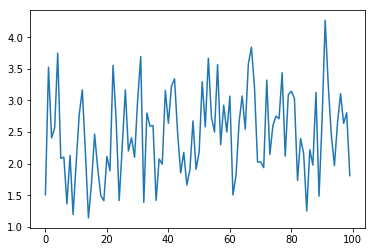

In [10]:
main()